In [10]:
import pandas as pd

# Load the dataset from CSV
file_path = 'River.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Filter the dataset to keep only rows where 'Source' is 'River'
filtered_data = data[data['Source'] == 'River']

# Save the filtered data to a new CSV file
filtered_file_path = 'Filtered_River.csv'
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered data saved to {filtered_file_path}")


Filtered data saved to Filtered_River.csv


C:\Users\sai\AppData\Local\Temp\ipykernel_21364\2288071094.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())


Epoch 1/20


c:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23593/23593 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accuracy: 0.8241 - loss: 0.4185 - val_accuracy: 0.8412 - val_loss: 0.3913
Epoch 2/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.8420 - loss: 0.3894 - val_accuracy: 0.8439 - val_loss: 0.3867
Epoch 3/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.8432 - loss: 0.3874 - val_accuracy: 0.8442 - val_loss: 0.3865
Epoch 4/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.8432 - loss: 0.3873 - val_accuracy: 0.8448 - val_loss: 0.3860
Epoch 5/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.8435 - loss: 0.3863 - val_accuracy: 0.8451 - val_loss: 0.3865
Epoch 6/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accuracy: 0.8436 - loss: 0.3868 - val_accuracy: 0.8451 - val_loss: 0.3864
Epoch 7/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.8433 - loss: 0.3874 - val_accuracy: 0.8448 - val_loss: 0.3862
Epoch 8/20
23593/23593 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.8434 - lo

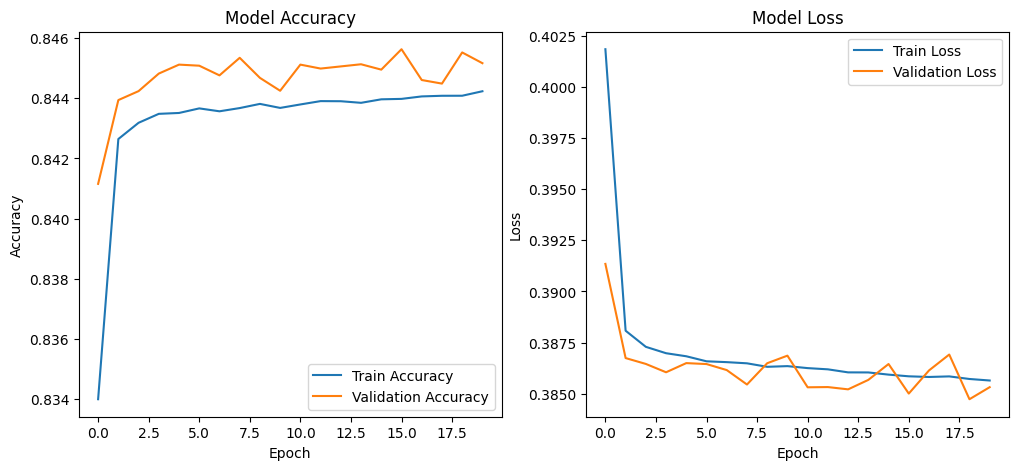

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('River.csv')

# Drop the Index column if it exists
data.drop(columns=['Index'], inplace=True, errors='ignore')

# Define the selected feature columns and target variable
features = ['pH', 'Nitrate', 'Turbidity', 'Odor', 'Water Temperature']
target = 'Target'

# Separate features and target variable
X = data[features]
y = data[target]

# Handle missing values
numerical_features = features  # Since all selected features are numerical

# Fill missing values for numerical features
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

# No categorical features in the selected list

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Combine transformers into a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Preprocess the features
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Create and compile the Keras model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Predict and evaluate
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary outcome

print(classification_report(y_test, y_pred))

# Visualization code
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
